In [2]:
#imports
import os
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from matplotlib import style

#plot a confusion matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.05)
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#load the dataset
path = "."

filename_read = os.path.join(path, "heart.csv")
df = pd.read_csv(filename_read)
df - df.reindex(np.random.permutation(df.index))

#columns to plot on the confusion matrix
df.columns = ['age', 'sex',	'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',	'ca', 'thal', 'target']
cols = ['age', 'sex']

#Encode the feature values which are strings to integers
for label in df.columns:
    df[label] = LabelEncoder().fit(df[label]).transform(df[label])

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   29    1   3        31    64    1        0       49      0       22      0   
1    3    1   2        22    80    0        1       84      0       32      0   
2    7    0   1        22    35    0        0       71      0       14      2   
3   22    1   1        14    67    0        1       76      0        8      2   
4   23    0   0        14   145    0        1       62      1        6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [23]:
print("Number of patients with heart disease: " + str(len(df[df.target == 1])))
print("Number of patients without heart disease: " + str(len(df[df.target == 0])))
print("Number of male patients: " + str(len(df[df.sex == 1])))
print("Number of female patients: " + str(len(df[df.sex == 0])))

Number of patients with heart disease: 165
Number of patients without heart disease: 138
Number of male patients: 207
Number of female patients: 96


Text(0, 0.5, 'Maximum heart rate')

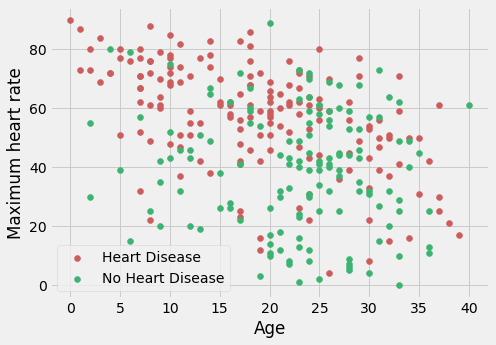

In [24]:
plt.figure(figsize=(7, 5))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="indianred")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="mediumseagreen")
plt.legend(["Heart Disease", "No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum heart rate")

In [148]:
# Create our X and y data    
result = []
for x in df.columns:
    if x != 'target':
        result.append(x)

X = df[result].values
y = df['target'].values

In [201]:
#measuring the untuned accuracy for the k-nearest neighbour model
accuracy_sum = 0
for i in range (1, 11):
    #split the dataset
    X_train, X_test, y_train, y_test = train_test_split(    
    X, y, test_size=0.2) 
    #build a knn model
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    #make predictions
    y_pred_knn = knn.predict(X_test)
    #print accuracy for each trial
    print('Trial ' + str(i) + ', kNN Accuracy: %.3f' % accuracy_score(y_test, y_pred_knn))
    accuracy_sum += accuracy_score(y_test, y_pred_knn)
    accuracy_mean = accuracy_sum / 10
#print mean accuracy score
print ('Mean accuracy (kNN): %.3f' % accuracy_mean)

Trial 1, kNN Accuracy: 0.705
Trial 2, kNN Accuracy: 0.705
Trial 3, kNN Accuracy: 0.689
Trial 4, kNN Accuracy: 0.639
Trial 5, kNN Accuracy: 0.623
Trial 6, kNN Accuracy: 0.705
Trial 7, kNN Accuracy: 0.639
Trial 8, kNN Accuracy: 0.721
Trial 9, kNN Accuracy: 0.607
Trial 10, kNN Accuracy: 0.656
Mean accuracy (kNN): 0.669


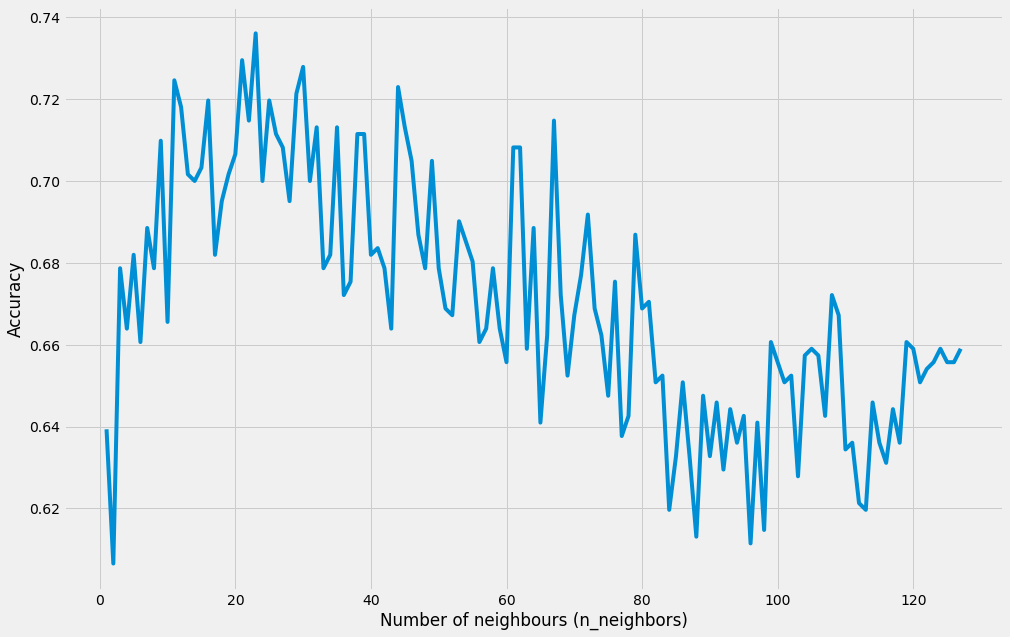

In [206]:
style.use('fivethirtyeight')

fig = plt.figure(figsize=(15,10))

#investigates the accuracy over a range of estimators plotting the result
accuracy_data = []
nums = []
for i in range(1,128):
    accuracy_sum = 0
    for j in range(1, 11):
        #split the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
        knn_model = KNeighborsClassifier(n_neighbors=i)
        knn_model.fit(X_train, y_train)
        y_model_knn = knn_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_model_knn)
        accuracy_sum = accuracy_sum + accuracy
    accuracy_mean = accuracy_sum / 10
    accuracy_data.append(accuracy_mean)
    nums.append(i)
    
plt.plot(nums,accuracy_data)
plt.xlabel("Number of neighbours (n_neighbors)")
plt.ylabel("Accuracy")
plt.show()

In [203]:
#measuring the accuracy for the k-nearest neighbour model with 25 n_neighbors
accuracy_sum = 0
for i in range (1, 11):
    #split the dataset
    X_train, X_test, y_train, y_test = train_test_split(    
    X, y, test_size=0.2) 
    #build a knn model
    knn = KNeighborsClassifier(n_neighbors=25)
    knn.fit(X_train, y_train)
    #make predictions
    y_pred_knn = knn.predict(X_test)
    #print accuracy for each trial
    print('Trial ' + str(i) + ', kNN Accuracy: %.3f' % accuracy_score(y_test, y_pred_knn))
    accuracy_sum += accuracy_score(y_test, y_pred_knn)
    accuracy_mean = accuracy_sum / 10
#print mean accuracy score
print ('Mean accuracy (kNN): %.3f' % accuracy_mean)

Trial 1, kNN Accuracy: 0.705
Trial 2, kNN Accuracy: 0.754
Trial 3, kNN Accuracy: 0.689
Trial 4, kNN Accuracy: 0.656
Trial 5, kNN Accuracy: 0.672
Trial 6, kNN Accuracy: 0.738
Trial 7, kNN Accuracy: 0.721
Trial 8, kNN Accuracy: 0.721
Trial 9, kNN Accuracy: 0.689
Trial 10, kNN Accuracy: 0.705
Mean accuracy (kNN): 0.705


In [204]:
#measuring the accuracy for the k-nearest neighbour model with distance weights
accuracy_sum = 0
for i in range (1, 11):
    #split the dataset
    X_train, X_test, y_train, y_test = train_test_split(    
    X, y, test_size=0.2) 
    #build a knn model
    knn = KNeighborsClassifier(weights='distance')
    knn.fit(X_train, y_train)
    #make predictions
    y_pred_knn = knn.predict(X_test)
    #print accuracy for each trial
    print('Trial ' + str(i) + ', kNN Accuracy: %.3f' % accuracy_score(y_test, y_pred_knn))
    accuracy_sum += accuracy_score(y_test, y_pred_knn)
    accuracy_mean = accuracy_sum / 10
#print mean accuracy score
print ('Mean accuracy (kNN): %.3f' % accuracy_mean)

Trial 1, kNN Accuracy: 0.639
Trial 2, kNN Accuracy: 0.590
Trial 3, kNN Accuracy: 0.607
Trial 4, kNN Accuracy: 0.721
Trial 5, kNN Accuracy: 0.754
Trial 6, kNN Accuracy: 0.639
Trial 7, kNN Accuracy: 0.672
Trial 8, kNN Accuracy: 0.656
Trial 9, kNN Accuracy: 0.705
Trial 10, kNN Accuracy: 0.672
Mean accuracy (kNN): 0.666


In [216]:
#measuring the untuned accuracy for the Random Forest model
accuracy_sum = 0
for i in range (1, 11):
    #split the dataset
    X_train, X_test, y_train, y_test = train_test_split(    
    X, y, test_size=0.2) 
    #build a random forest model
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    #make predictions
    y_pred_rf = rf.predict(X_test)
    #print accuracy for each trial
    print('Trial ' + str(i) + ', RF Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf))
    accuracy_sum += accuracy_score(y_test, y_pred_rf)
    accuracy_mean = accuracy_sum / 10
#print mean accuracy score
print ('Mean accuracy (RF): %.3f' % accuracy_mean)

Trial 1, RF Accuracy: 0.787
Trial 2, RF Accuracy: 0.885
Trial 3, RF Accuracy: 0.803
Trial 4, RF Accuracy: 0.787
Trial 5, RF Accuracy: 0.803
Trial 6, RF Accuracy: 0.721
Trial 7, RF Accuracy: 0.836
Trial 8, RF Accuracy: 0.820
Trial 9, RF Accuracy: 0.787
Trial 10, RF Accuracy: 0.836
Mean accuracy (RF): 0.807


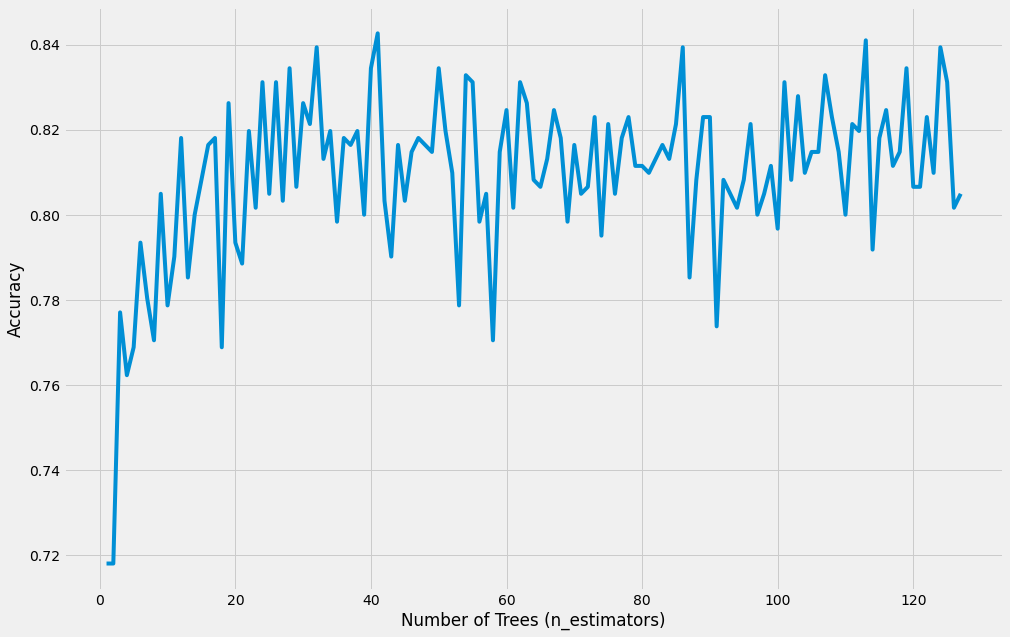

In [207]:
style.use('fivethirtyeight')

fig = plt.figure(figsize=(15,10))

#investigates the accuracy over a range of estimators plotting the result
accuracy_data = []
nums = []
for i in range(1,128):
    accuracy_sum = 0
    for j in range (1, 11):
        #split the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
        rf_model = RandomForestClassifier(n_estimators=i)
        rf_model.fit(X_train, y_train)
        y_model_rf = rf_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_model_rf)
        accuracy_sum = accuracy_sum + accuracy
    accuracy_mean = accuracy_sum / 10
    accuracy_data.append(accuracy_mean)
    nums.append(i)
    
plt.plot(nums,accuracy_data)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.show()

In [215]:
#measuring the accuracy for the Random Forest model with entropy criterion
accuracy_sum = 0
for i in range (1, 11):
    #split the dataset
    X_train, X_test, y_train, y_test = train_test_split(    
    X, y, test_size=0.2) 
    #build a random forest model
    rf = RandomForestClassifier(criterion="entropy")
    rf.fit(X_train, y_train)
    #make predictions
    y_pred_rf = rf.predict(X_test)
    #print accuracy for each trial
    print('Trial ' + str(i) + ', RF Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf))
    accuracy_sum += accuracy_score(y_test, y_pred_rf)
    accuracy_mean = accuracy_sum / 10
#print mean accuracy score
print ('Mean accuracy (RF): %.3f' % accuracy_mean)

Trial 1, RF Accuracy: 0.787
Trial 2, RF Accuracy: 0.787
Trial 3, RF Accuracy: 0.885
Trial 4, RF Accuracy: 0.803
Trial 5, RF Accuracy: 0.820
Trial 6, RF Accuracy: 0.803
Trial 7, RF Accuracy: 0.820
Trial 8, RF Accuracy: 0.852
Trial 9, RF Accuracy: 0.869
Trial 10, RF Accuracy: 0.934
Mean accuracy (RF): 0.836


In [217]:
#build a new data frame with three columns, the actual values of the test data, 
#and the predictions of the model
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted (kNN)': y_pred_knn, 'Predicted (RF)': y_pred_rf})
df_head = df_compare.head(20)
print(df_head)

    Actual  Predicted (kNN)  Predicted (RF)
0        0                0               0
1        0                0               0
2        1                1               1
3        0                1               0
4        1                0               1
5        0                1               0
6        0                1               0
7        1                1               1
8        1                1               1
9        1                1               1
10       1                0               1
11       0                0               0
12       1                0               1
13       0                1               0
14       1                0               1
15       1                0               1
16       1                1               1
17       1                0               1
18       1                0               1
19       1                0               0


Confusion matrix, without normalization
[[ 6 20]
 [11 24]]
Normalized confusion matrix
[[0.23 0.77]
 [0.31 0.69]]


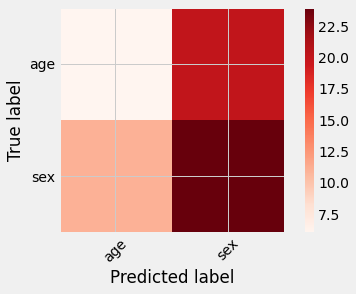

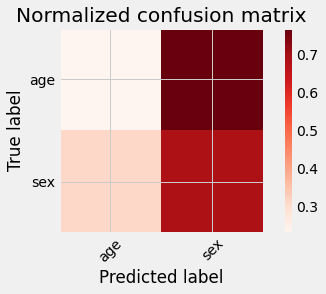

In [31]:
#print confusion matrix numerically, using library method
cm = confusion_matrix(y_test, y_pred_knn)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, cols, title='')

#graphical plots of confusion matrix using method above
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, cols, title='Normalized confusion matrix')
plt.show()